<a href="https://colab.research.google.com/github/parveen180/Machine-learning-project-python/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [164]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import  confusion_matrix

In [165]:
dataset=pd.read_csv('/content/Mall_Customers.csv')

In [166]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [167]:
dataset.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [168]:
x=dataset.iloc[:,[3,4]].values

In [169]:
print(x)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

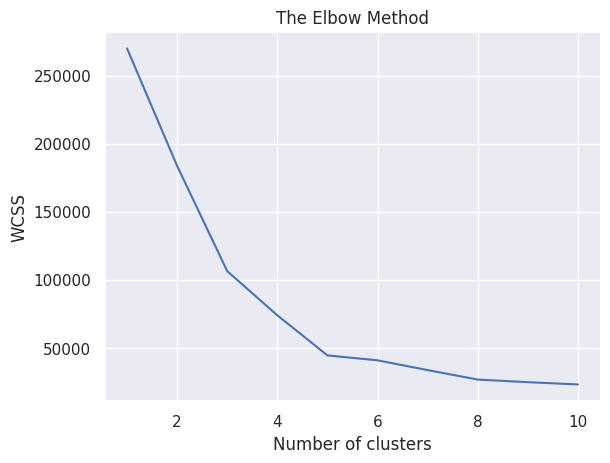

In [170]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [171]:
kmeans=KMeans(n_clusters=5, init='k-means++' ,random_state=42)
y_kmeans=kmeans.fit_predict(x)

In [179]:
print(y_kmeans)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [183]:
print(np.concatenate((x,y_kmeans.reshape(200,1)),1))

[[ 15  39   4]
 [ 15  81   2]
 [ 16   6   4]
 [ 16  77   2]
 [ 17  40   4]
 [ 17  76   2]
 [ 18   6   4]
 [ 18  94   2]
 [ 19   3   4]
 [ 19  72   2]
 [ 19  14   4]
 [ 19  99   2]
 [ 20  15   4]
 [ 20  77   2]
 [ 20  13   4]
 [ 20  79   2]
 [ 21  35   4]
 [ 21  66   2]
 [ 23  29   4]
 [ 23  98   2]
 [ 24  35   4]
 [ 24  73   2]
 [ 25   5   4]
 [ 25  73   2]
 [ 28  14   4]
 [ 28  82   2]
 [ 28  32   4]
 [ 28  61   2]
 [ 29  31   4]
 [ 29  87   2]
 [ 30   4   4]
 [ 30  73   2]
 [ 33   4   4]
 [ 33  92   2]
 [ 33  14   4]
 [ 33  81   2]
 [ 34  17   4]
 [ 34  73   2]
 [ 37  26   4]
 [ 37  75   2]
 [ 38  35   4]
 [ 38  92   2]
 [ 39  36   4]
 [ 39  61   0]
 [ 39  28   4]
 [ 39  65   2]
 [ 40  55   0]
 [ 40  47   0]
 [ 40  42   0]
 [ 40  42   0]
 [ 42  52   0]
 [ 42  60   0]
 [ 43  54   0]
 [ 43  60   0]
 [ 43  45   0]
 [ 43  41   0]
 [ 44  50   0]
 [ 44  46   0]
 [ 46  51   0]
 [ 46  46   0]
 [ 46  56   0]
 [ 46  55   0]
 [ 47  52   0]
 [ 47  59   0]
 [ 48  51   0]
 [ 48  59   0]
 [ 48  50 

X[y_kmeans==2, 0]=First column of x-Annual Income

x[y_kmeans==0, 1]=Second column of x Spending Score

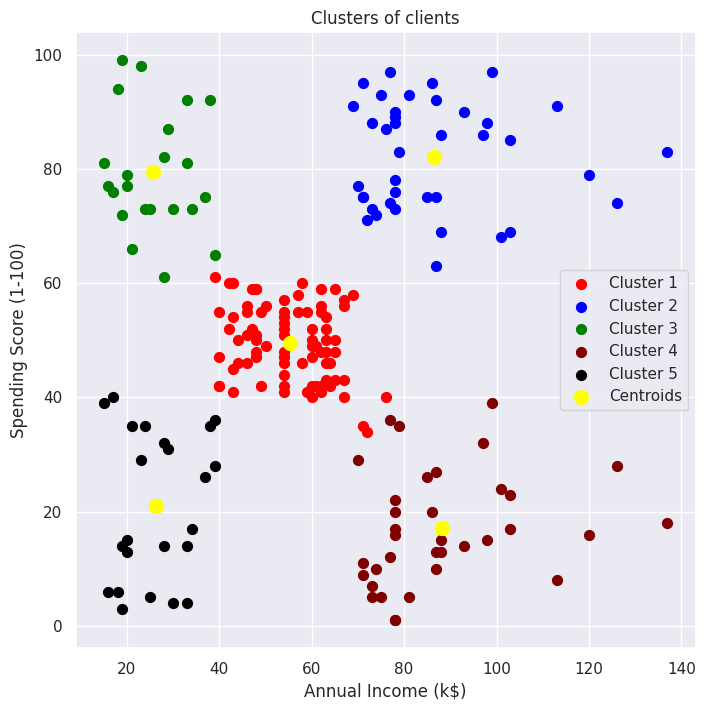

In [189]:
plt.figure(figsize=(8,8))
plt.scatter(x[y_kmeans==0, 0],x[y_kmeans==0, 1],s=50,c='red', label='Cluster 1')
plt.scatter(x[y_kmeans==1, 0],x[y_kmeans==1, 1],s=50,c='blue', label='Cluster 2')
plt.scatter(x[y_kmeans==2, 0],x[y_kmeans==2, 1],s=50,c='green', label='Cluster 3')
plt.scatter(x[y_kmeans==3, 0],x[y_kmeans==3, 1],s=50,c='maroon', label='Cluster 4')
plt.scatter(x[y_kmeans==4, 0],x[y_kmeans==4, 1],s=50,c='black', label='Cluster 5')
#centroid plotting
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100, c='yellow',label='Centroids')
plt.title('Clusters of clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
